In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gzip      # this module is used to read and apply functions directly on zip files , it's used to compress the file
import simplejson  # it is simple encoder and decoder of JSON files for python

%matplotlib inline

# META INFORMATION OF THE DATASETS

All category datsets contains the same attributes  

### product/productId: it gives the productid of the product in each category
### product/title: this attribute gives the title of the product in the category
### product/price: gives the price of the product 
### review/userId: the userid of the user who bought the corresponding product
### review/profileName: profile name of the user account
### review/helpfulness: people's rating of how much proportion the product is helpful
### review/score: rating given by the user to the corresponding product
### review/time: The time when the user gave the review to the product bought
### review/summary: just a summary of the product
### review/text: the whole text given by the user to the corresponding product

# Objective of the Project

The overall objective of the project is to build an app with a simple UI. The app will allow the user to 
choose between 5 categories of products  On choosing the category of product, recommendations are displayed based on user based similarity .
The UI is designed based on the FASTAPI

The data required for this project is taken from the website (http://snap.stanford.edu/data/web-Amazon-links.html). It contains	user reviews	(numerical	rating	and	textual	comment)	towards	amazon	products	on	24	product	categories(e.g.,	cell	phones, clothing,	beauty,	etc.),	and	there is	an	independent	dataset	for	each	product	category. We will select 5 product categories in this project i.e., Arts.txt.gz, Cell_Phones_&_Accessories.txt.gz, office_products.txt.gz, video_games.txt.gz, electronics.txt.gz. On choosing the category of product, recommendations are displayed based on user based similarity(Collaborative Filtering).

In [35]:
!pip install simplejson

## Parsing the data

In [3]:
def parse(filename):
    f = gzip.open(filename, 'r')
    entry = {}
    for l in f:
        l = l.strip()
        l = l.decode()
        colonPos = l.find(':')
        if colonPos == -1:
            yield entry
            entry = {}
            continue
        eName = l[:colonPos]
        rest = l[colonPos+2:]
        entry[eName] = rest
    yield entry
    
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')    # converting into python DataFrame

# Arts Category

## Data Cleaning

In [5]:
Arts = getDF('D:\Academics\sem 4\Labs\ML_Mini-Project\Datasets\Arts.txt.gz')
Arts.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000GKXY4S,Crazy Shape Scissor Set,unknown,A1QA985ULVCQOB,"Carleen M. Amadio ""Lady Dragonfly""",2/2,5.0,1314057600,Fun for adults too!,I really enjoy these scissors for my inspirati...
1,B000GKXY4S,Crazy Shape Scissor Set,unknown,ALCX2ELNHLQA7,Barbara,0/0,5.0,1328659200,Making the cut!,Looked all over in art supply and other stores...
2,B000140KIW,"Fiskars Softouch Multi-Purpose Scissors 10""",unknown,A2M2M4R1KG5WOL,L. Heminway,1/1,5.0,1156636800,"Fiskars Softouch Multi-Purpose Scissors, 10""",These are the BEST scissors I have ever owned....
3,B000140KIW,"Fiskars Softouch Multi-Purpose Scissors 10""",unknown,ARQAQ6ZYMFPCA,R. GARCIA,0/0,5.0,1214784000,Best scissors ever,This Fiskars Scissors are the best i've bougth...
4,B000140KIW,"Fiskars Softouch Multi-Purpose Scissors 10""",unknown,A3FPG4LAJ1HOHZ,"Dea Carey ""deacarey""",0/0,5.0,1173484800,A great tool to make your work easier,I finally gave in and bought these after years...


In [6]:
Arts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27980 entries, 0 to 27979
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product/productId   27980 non-null  object
 1   product/title       27980 non-null  object
 2   product/price       27980 non-null  object
 3   review/userId       27980 non-null  object
 4   review/profileName  27980 non-null  object
 5   review/helpfulness  27980 non-null  object
 6   review/score        27980 non-null  object
 7   review/time         27980 non-null  object
 8   review/summary      27980 non-null  object
 9   review/text         27980 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB


## Removing the duplicate records in the categories

In [7]:
Arts.drop_duplicates(keep=False,inplace=True)

In [8]:
Arts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27951 entries, 0 to 27979
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product/productId   27951 non-null  object
 1   product/title       27951 non-null  object
 2   product/price       27951 non-null  object
 3   review/userId       27951 non-null  object
 4   review/profileName  27951 non-null  object
 5   review/helpfulness  27951 non-null  object
 6   review/score        27951 non-null  object
 7   review/time         27951 non-null  object
 8   review/summary      27951 non-null  object
 9   review/text         27951 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB


In [12]:
un_price = Arts[Arts["product/price"]=='unknown']

print(un_price.shape)
un_price.head()   # unknown price dataframe

(3885, 10)


,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000GKXY4S,Crazy Shape Scissor Set,unknown,A1QA985ULVCQOB,"Carleen M. Amadio ""Lady Dragonfly""",2/2,5.0,1314057600,Fun for adults too!,I really enjoy these scissors for my inspirati...
1,B000GKXY4S,Crazy Shape Scissor Set,unknown,ALCX2ELNHLQA7,Barbara,0/0,5.0,1328659200,Making the cut!,Looked all over in art supply and other stores...
2,B000140KIW,"Fiskars Softouch Multi-Purpose Scissors 10""",unknown,A2M2M4R1KG5WOL,L. Heminway,1/1,5.0,1156636800,"Fiskars Softouch Multi-Purpose Scissors, 10""",These are the BEST scissors I have ever owned....
3,B000140KIW,"Fiskars Softouch Multi-Purpose Scissors 10""",unknown,ARQAQ6ZYMFPCA,R. GARCIA,0/0,5.0,1214784000,Best scissors ever,This Fiskars Scissors are the best i've bougth...
4,B000140KIW,"Fiskars Softouch Multi-Purpose Scissors 10""",unknown,A3FPG4LAJ1HOHZ,"Dea Carey ""deacarey""",0/0,5.0,1173484800,A great tool to make your work easier,I finally gave in and bought these after years...


In [10]:
un_price['product/productId'].value_counts()     # there are 198 unknown B000N77LCA(productid) are present

B000N77LCA    198
B000BS01KK     85
B000S11SOS     76
B000PYDJF4     70
0806998075     67
             ... 
B000FDS3VU      1
B0009VZ9YW      1
B000AO6TMO      1
B000AXPIOU      1
B000BI7K8Q      1
Name: product/productId, Length: 944, dtype: int64

In [11]:
Arts[Arts['product/productId']=='B000N77LCA']   # checking how many unknown B000N77LCA(productid) are present

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
16790,B000N77LCA,The Sibley Guide To Birds,unknown,A2E9ZDE3OP4LOM,"M. Ahrens ""maggieliz""",1/3,4.0,1061856000,good for any age,My nephews (both 6) enjoy looking out the wind...
16791,B000N77LCA,The Sibley Guide To Birds,unknown,A28PJ7EVIW6NBV,MR JIM BARTY,2/5,5.0,1073952000,A Sibley classic,"A truly magnificent book, which, coupled with ..."
16792,B000N77LCA,The Sibley Guide To Birds,unknown,AHVF9SF3VTKPU,Anil J. Antony,14/25,4.0,987724800,Wrong Book for a Beginner,This book is excellent in that it shows multip...
16793,B000N77LCA,The Sibley Guide To Birds,unknown,A2BN86PMJKZ80S,Deanna Prague,3/7,4.0,985305600,The Sibley Guide to Birds: Field Identification,This rating should actually be a four and a ha...
16794,B000N77LCA,The Sibley Guide To Birds,unknown,A2GS3S35U35WZ2,Vivian Phyle,0/2,5.0,1036195200,What an amazing book.,Ihave been looking for a good bird book for se...
...,...,...,...,...,...,...,...,...,...,...
16983,B000N77LCA,The Sibley Guide To Birds,unknown,A1KFFYMWGYHEUW,Kathryn Woodell-Akers,0/0,5.0,1360713600,A great guide to birding....,I was absolutely thrilled to receive this Sibl...
16984,B000N77LCA,The Sibley Guide To Birds,unknown,A1FKHYI9QY78G,eel,0/0,5.0,1360368000,nice,good reference field guide book for beginner's...
16985,B000N77LCA,The Sibley Guide To Birds,unknown,AD9UMETFOIB83,BK,0/0,5.0,1359936000,Best Bird Books,"This book covers exactly what you'd expect, ha..."
16986,B000N77LCA,The Sibley Guide To Birds,unknown,A3B822BTXHXPPG,Barry Hershfeld,0/0,5.0,1359936000,The best (table) guide.,This is the larger book and is Large for a fie...


In [12]:
Arts[Arts['product/productId']=='B000N77LCA']['product/price'].value_counts()   # so there are 198 unknown prices in B000N77LCA(productid) 

unknown    198
Name: product/price, dtype: int64

## Here the number of unknown prices of a product id is equal to the total number of unknown values in the particular category 

### i.e let's say we have 5 records corresponding to a product and if in 4 records the price of product is unknown but in the last record the value is known so we can replace the unknown price of the product with the known price BUT IN OUR CATEGORY DATASETS IF ONE OF PRODUCT HAS UNKNOWN PRICE THEN THE RECORDS CORRESPONDING TO THE PRODUCT HAS UNKNOWN PRICE SO WE CAN REMOVE THE UNKNOWN PRICE records IN ALL DATASETS


### unknown priced products are not included in our Analysis so we are dropping the unknown priced products

In [13]:
Arts = Arts[Arts['product/price']!='unknown']
Arts.head()     # Arts Products which which contain known prices

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
7,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2PXVMF9DH8NDZ,M. Sarrao,8/8,3.0,1269043200,Not Very Sharp,"Like the previous reviewer, I was very happy t..."
8,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",5/5,4.0,1321833600,Nice Large Basic Safety Pins,****These are your basic large safety pins and...
9,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2B6I0N8RNAQXJ,Allyn C. Cornell,0/0,5.0,1360886400,Great Safety Pins,These Dritz(R) Extra Large Safety Pins are gre...
10,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2FMZ7LFWTZCJ4,Judith A. Holland,0/0,4.0,1360627200,When you need a safety pin...,We are organizing our costume stock and large ...
11,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1AUXDAAZR2VNT,D. M. Albright,0/0,1.0,1358899200,Safety pins,As another reviewer noted these do not pierce ...


In [14]:
Arts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24066 entries, 7 to 27979
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product/productId   24066 non-null  object
 1   product/title       24066 non-null  object
 2   product/price       24066 non-null  object
 3   review/userId       24066 non-null  object
 4   review/profileName  24066 non-null  object
 5   review/helpfulness  24066 non-null  object
 6   review/score        24066 non-null  object
 7   review/time         24066 non-null  object
 8   review/summary      24066 non-null  object
 9   review/text         24066 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


### checking for null values

In [15]:
Arts.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

### There are no null value in the Dataset

In [15]:
pd.DataFrame(Arts["review/userId"].value_counts())

,review/userId
unknown,110
A2D1LPEUCTNT8X,37
A1HACP80YXJRPP,23
A22CW0ZHY3NJH8,22
A1AA2CKVYW2MHE,18
...,...
A3KO53IR107UAT,1
A29O34CHIRP4VO,1
A3UUHJSW07BB30,1
A2HYLFSSLL7KCK,1


## Unknown userid gave the more reviews in Arts Dataset But Uknown userid is not useful in our Analysis

In [16]:
Arts = Arts[Arts['review/userId']!='unknown']
Arts.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
7,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2PXVMF9DH8NDZ,M. Sarrao,8/8,3.0,1269043200,Not Very Sharp,"Like the previous reviewer, I was very happy t..."
8,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",5/5,4.0,1321833600,Nice Large Basic Safety Pins,****These are your basic large safety pins and...
9,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2B6I0N8RNAQXJ,Allyn C. Cornell,0/0,5.0,1360886400,Great Safety Pins,These Dritz(R) Extra Large Safety Pins are gre...
10,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2FMZ7LFWTZCJ4,Judith A. Holland,0/0,4.0,1360627200,When you need a safety pin...,We are organizing our costume stock and large ...
11,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1AUXDAAZR2VNT,D. M. Albright,0/0,1.0,1358899200,Safety pins,As another reviewer noted these do not pierce ...


## Cleaning the data and removing the special characters and replacing  the contractions with its expansion by converting the uppercase character to lower case. Also, removing the punctuations.

In [17]:
import contractions

In [18]:
contractions={
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
    "doin'": "doing",
    "goin'": "going",
    "nothin'": "nothing",
    "somethin'": "something",
}

In [19]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [20]:
# function checking
x = "Hello what're you doing. I can't don't this"
print(cont_to_exp(x))

Hello what are you doing. I cannot do not this


In [21]:
# applying the function to all review text and summary statements 
Arts["review/text"] = Arts["review/text"].apply(lambda x:cont_to_exp(x))
Arts["review/summary"] = Arts["review/summary"].apply(lambda x:cont_to_exp(x))
Arts.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
7,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2PXVMF9DH8NDZ,M. Sarrao,8/8,3.0,1269043200,Not Very Sharp,"Like the previous reviewer, I was very happy t..."
8,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",5/5,4.0,1321833600,Nice Large Basic Safety Pins,****These are your basic large safety pins and...
9,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2B6I0N8RNAQXJ,Allyn C. Cornell,0/0,5.0,1360886400,Great Safety Pins,These Dritz(R) Extra Large Safety Pins are gre...
10,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2FMZ7LFWTZCJ4,Judith A. Holland,0/0,4.0,1360627200,When you need a safety pin...,We are organizing our costume stock and large ...
11,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1AUXDAAZR2VNT,D. M. Albright,0/0,1.0,1358899200,Safety pins,As another reviewer noted these do not pierce ...


In [22]:
Arts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23956 entries, 7 to 27979
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product/productId   23956 non-null  object
 1   product/title       23956 non-null  object
 2   product/price       23956 non-null  object
 3   review/userId       23956 non-null  object
 4   review/profileName  23956 non-null  object
 5   review/helpfulness  23956 non-null  object
 6   review/score        23956 non-null  object
 7   review/time         23956 non-null  object
 8   review/summary      23956 non-null  object
 9   review/text         23956 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


## Here price and rating are in categorical variables so we need to convert into numerical type to analyse it

In [23]:
Arts['product/price'] = pd.to_numeric(Arts['product/price'])
Arts['review/score'] = pd.to_numeric(Arts['review/score'])

In [24]:
Arts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23956 entries, 7 to 27979
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product/productId   23956 non-null  object 
 1   product/title       23956 non-null  object 
 2   product/price       23956 non-null  float64
 3   review/userId       23956 non-null  object 
 4   review/profileName  23956 non-null  object 
 5   review/helpfulness  23956 non-null  object 
 6   review/score        23956 non-null  float64
 7   review/time         23956 non-null  object 
 8   review/summary      23956 non-null  object 
 9   review/text         23956 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.0+ MB


# EXPLORATORY DATA ANALYSIS

## Decreasing order of the reviews given by the userid

In [36]:
user_id = pd.DataFrame(Arts["review/userId"].value_counts())

In [40]:
print(user_id)

                review/userId
A2D1LPEUCTNT8X             37
A1HACP80YXJRPP             23
A22CW0ZHY3NJH8             22
A1AA2CKVYW2MHE             18
A1D86BN68B148L             17
...                       ...
A29O34CHIRP4VO              1
A3UUHJSW07BB30              1
A2HYLFSSLL7KCK              1
ABQFIX6QQIKFJ               1
A2GD35ZM1NAR2N              1

[20689 rows x 1 columns]


In [41]:
print("There are total ",user_id.shape[0]," userid's in this category")

There are total  20689  userid's in this category


### There are total 20693 userid's in this cateory

## Decreasing order of reviews of the product with productid 

In [26]:
pd.DataFrame(Arts["product/productId"].value_counts())

,product/productId
B000JQM1DE,1391
B0000CBK1L,596
B000F7DPEQ,557
B000EOX28E,321
B0002KHBS2,220
...,...
B000CCRX7O,1
B000MQFU4I,1
B0006HG14G,1
B000FAFK5K,1


## There are 3264 different products in the Arts DataSet 

## Defing the min_max_mean function

In [27]:
def min_max_mean(df):
    print("The minimum price of the products in this Category is: ",df['product/price'].min())
    print("The maximum price of the products in this Category is: ",df['product/price'].max())
    print("The average price of the products in this Category is: ",df['product/price'].mean())
    

In [28]:
min_max_mean(Arts)

The minimum price of the products in this Category is:  0.01
The maximum price of the products in this Category is:  890.0
The average price of the products in this Category is:  40.09155994322884


In [29]:
Arts.describe()

,product/price,review/score
count,23956.000000,23956.000000
mean,40.091560,4.158582
std,55.773681,1.301839
min,0.010000,1.000000
25%,7.240000,4.000000
50%,14.950000,5.000000
75%,42.537500,5.000000
max,890.000000,5.000000


In [42]:
print(Arts['review/score'].value_counts())

5.0    14692
4.0     3974
1.0     2205
3.0     1892
2.0     1193
Name: review/score, dtype: int64


# Many of them have given the 5 ratings to this Category

## Distribution of overall product ratings

C:\Users\tbala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ditrbution of Overall rating')

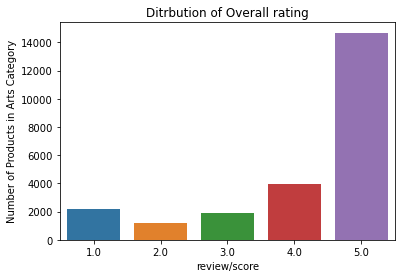

In [31]:
sns.countplot(Arts['review/score'])
plt.xlabel('review/score')
plt.ylabel('Number of Products in Arts Category')
plt.title('Ditrbution of Overall rating')

In [32]:
def save_as_pickle(obj, root_dir, obj_name):
    """
    Saves file locally
    """
    obj_path = obj_name + '.pkl'
    joblib.dump(obj, root_dir + obj_name + '.pkl')
    return obj_path


## extracting the preprocessed Dataframe into a .csv file for further analysis

In [34]:
Arts.to_csv(r'D:\Academics\sem 4\Labs\ML_Mini-Project\new_phase\preprocessed_Arts.csv',index = False)

# Cell_Phones_&_Accessories

In [40]:
phn_acc = getDF('Cell_Phones_&_Accessories.txt.gz')
phn_acc.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...


# DATA CLEANING

In [41]:
phn_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78930 entries, 0 to 78929
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product/productId   78930 non-null  object
 1   product/title       78930 non-null  object
 2   product/price       78930 non-null  object
 3   review/userId       78930 non-null  object
 4   review/profileName  78930 non-null  object
 5   review/helpfulness  78930 non-null  object
 6   review/score        78930 non-null  object
 7   review/time         78930 non-null  object
 8   review/summary      78930 non-null  object
 9   review/text         78930 non-null  object
dtypes: object(10)
memory usage: 6.6+ MB


In [42]:
phn_acc.drop_duplicates(keep=False,inplace=True)

In [43]:
phn_acc['product/price'].value_counts()   # here prices are in categorical variables

unknown    43246
89.99       3452
29.99       1099
6.99         845
19.99        755
           ...  
14.53          1
6.92           1
6.82           1
7.30           1
13.16          1
Name: product/price, Length: 944, dtype: int64

## unknown priced products are not included in our Analysis so we are dropping the unknown priced products

In [44]:
phn_acc = phn_acc[phn_acc['product/price']!='unknown']
phn_acc.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
19,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1RCOK89DON3YN,L. Henry,1/1,5.0,1212364800,Great Buy!!,I thought this item was great for the money. I...
20,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1IDTV3JKFOLVT,"Rex Moncrief ""www.smartergeek.com""",0/0,4.0,1222732800,Charger works great,The charger works fine as advertised. The loca...
30,B00004WINT,Jabra EarGels - Clear,9.70,A29UBSC2VMDUL4,"Jason ""Jason""",9/10,5.0,1213401600,Jawbone Ear Fix,If you have had an issue with the Jawbone head...
31,B00004WINT,Jabra EarGels - Clear,9.70,A7QCUJOH9CIYR,"Dragonspeak ""khsdragon""",6/6,5.0,1187568000,Jabra gels fit well on my aliph jawbone after ...,I accidentally tore the original factory bud o...
32,B00004WINT,Jabra EarGels - Clear,9.70,AX73D8OAWC7TF,"Nathaniel A. McLaughlin ""Blast Pattern""",6/6,4.0,1197504000,Fit is execellent.,Used these to replace the painfuly uncomfortab...


## checking for null values

In [45]:
phn_acc.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

## There are no null values in this Category

In [46]:
pd.DataFrame(phn_acc["review/userId"].value_counts())

,review/userId
unknown,276
A1RCGK44YXNBBB,28
A4IX5FZOWQVQN,25
A1SFCPHZK18NEH,20
A3ILVGZSKUCC5Z,16
...,...
A22L5J7X8UQ9PL,1
A36GBEL3W3NO1S,1
A2LZ2ZG2H0Z1TZ,1
A337UITSW1N03D,1


## Unknown userid gave the more reviews in Arts Dataset But Uknown userid is not useful in our Analysis

In [47]:
phn_acc = phn_acc[phn_acc['review/userId']!='unknown']
phn_acc.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
19,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1RCOK89DON3YN,L. Henry,1/1,5.0,1212364800,Great Buy!!,I thought this item was great for the money. I...
20,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1IDTV3JKFOLVT,"Rex Moncrief ""www.smartergeek.com""",0/0,4.0,1222732800,Charger works great,The charger works fine as advertised. The loca...
30,B00004WINT,Jabra EarGels - Clear,9.70,A29UBSC2VMDUL4,"Jason ""Jason""",9/10,5.0,1213401600,Jawbone Ear Fix,If you have had an issue with the Jawbone head...
31,B00004WINT,Jabra EarGels - Clear,9.70,A7QCUJOH9CIYR,"Dragonspeak ""khsdragon""",6/6,5.0,1187568000,Jabra gels fit well on my aliph jawbone after ...,I accidentally tore the original factory bud o...
32,B00004WINT,Jabra EarGels - Clear,9.70,AX73D8OAWC7TF,"Nathaniel A. McLaughlin ""Blast Pattern""",6/6,4.0,1197504000,Fit is execellent.,Used these to replace the painfuly uncomfortab...


## Cleaning the data and removing the special characters and replacing the contractions with its expansion by converting the uppercase character to lower case. Also, removing the punctuations.

In [48]:
# applying the function to all review statements 
phn_acc["review/text"] = phn_acc["review/text"].apply(lambda x:cont_to_exp(x))
phn_acc["review/summary"] = phn_acc["review/summary"].apply(lambda x:cont_to_exp(x))
phn_acc.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
19,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1RCOK89DON3YN,L. Henry,1/1,5.0,1212364800,Great Buy!!,I thought this item was great for the money. I...
20,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1IDTV3JKFOLVT,"Rex Moncrief ""www.smartergeek.com""",0/0,4.0,1222732800,Charger works great,The charger works fine as advertised. The loca...
30,B00004WINT,Jabra EarGels - Clear,9.70,A29UBSC2VMDUL4,"Jason ""Jason""",9/10,5.0,1213401600,Jawbone Ear Fix,If you have had an issue with the Jawbone head...
31,B00004WINT,Jabra EarGels - Clear,9.70,A7QCUJOH9CIYR,"Dragonspeak ""khsdragon""",6/6,5.0,1187568000,Jabra gels fit well on my aliph jawbone after ...,I accidentally tore the original factory bud o...
32,B00004WINT,Jabra EarGels - Clear,9.70,AX73D8OAWC7TF,"Nathaniel A. McLaughlin ""Blast Pattern""",6/6,4.0,1197504000,Fit is execellent.,Used these to replace the painfuly uncomfortab...


## Here price and rating are in categorical variables so we need to convert into numerical type to analyse it

In [49]:
phn_acc['product/price'] = pd.to_numeric(phn_acc['product/price'])
phn_acc['review/score'] = pd.to_numeric(phn_acc['review/score'])

In [50]:
phn_acc.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
19,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1RCOK89DON3YN,L. Henry,1/1,5.0,1212364800,Great Buy!!,I thought this item was great for the money. I...
20,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1IDTV3JKFOLVT,"Rex Moncrief ""www.smartergeek.com""",0/0,4.0,1222732800,Charger works great,The charger works fine as advertised. The loca...
30,B00004WINT,Jabra EarGels - Clear,9.70,A29UBSC2VMDUL4,"Jason ""Jason""",9/10,5.0,1213401600,Jawbone Ear Fix,If you have had an issue with the Jawbone head...
31,B00004WINT,Jabra EarGels - Clear,9.70,A7QCUJOH9CIYR,"Dragonspeak ""khsdragon""",6/6,5.0,1187568000,Jabra gels fit well on my aliph jawbone after ...,I accidentally tore the original factory bud o...
32,B00004WINT,Jabra EarGels - Clear,9.70,AX73D8OAWC7TF,"Nathaniel A. McLaughlin ""Blast Pattern""",6/6,4.0,1197504000,Fit is execellent.,Used these to replace the painfuly uncomfortab...


In [51]:
phn_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35339 entries, 19 to 78918
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product/productId   35339 non-null  object 
 1   product/title       35339 non-null  object 
 2   product/price       35339 non-null  float64
 3   review/userId       35339 non-null  object 
 4   review/profileName  35339 non-null  object 
 5   review/helpfulness  35339 non-null  object 
 6   review/score        35339 non-null  float64
 7   review/time         35339 non-null  object 
 8   review/summary      35339 non-null  object 
 9   review/text         35339 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.0+ MB


# EXPLORATORY DATA ANALYSIS

## Decreasing order of the reviews given by the userid

In [52]:
pd.DataFrame(phn_acc["review/userId"].value_counts())

,review/userId
A1RCGK44YXNBBB,28
A4IX5FZOWQVQN,25
A1SFCPHZK18NEH,20
A3ILVGZSKUCC5Z,16
A3JHC8O59WDHFZ,10
...,...
A36GBEL3W3NO1S,1
A2LZ2ZG2H0Z1TZ,1
A337UITSW1N03D,1
A1HGTEVIKE0BV7,1


### There are total 33064 userid's in Cell_Phones_&_Accessories category

## Decreasing order of reviews of the product with productid

In [53]:
pd.DataFrame(phn_acc["product/productId"].value_counts())

,product/productId
B0009B0IX4,3438
B0007WWAGI,983
B000RUPEOA,623
B00006JPFU,522
B000Q6R4MK,512
...,...
B000H6AX8G,1
B00020D7N0,1
B000E246V8,1
B000050FZM,1


### There are total 2846 differet products in Cell_Phones_&_Accessories category

In [54]:
min_max_mean(phn_acc)

The minimum price of the products in this Category is:  0.01
The maximum price of the products in this Category is:  569.95
The average price of the products in this Category is:  31.963257873731415


In [55]:
phn_acc.describe()

,product/price,review/score
count,35339.000000,35339.000000
mean,31.963258,3.639803
std,55.750532,1.528921
min,0.010000,1.000000
25%,4.690000,2.000000
50%,9.700000,4.000000
75%,34.990000,5.000000
max,569.950000,5.000000


In [56]:
phn_acc['review/score'].value_counts()

5.0    15395
4.0     7319
1.0     6337
3.0     3463
2.0     2825
Name: review/score, dtype: int64

## Many of them have given the 5 ratings to this Category

# Distribution of overall product ratings

In [57]:
x = phn_acc['review/score']

In [58]:
phn_acc['review/score'].value_counts()

5.0    15395
4.0     7319
1.0     6337
3.0     3463
2.0     2825
Name: review/score, dtype: int64

C:\Users\tbala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ditrbution of Overall rating')

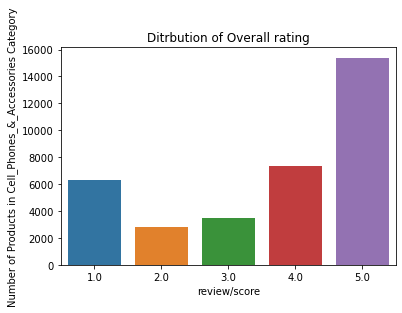

In [59]:
sns.countplot(phn_acc['review/score'])
plt.xlabel('review/score')
plt.ylabel('Number of Products in Cell_Phones_&_Accessories Category')
plt.title('Ditrbution of Overall rating')

In [61]:
phn_acc.to_csv(r'C:\Users\tbala\OneDrive\Desktop\Academics\sem 4\Labs\ML_Mini-Project\new_phase\preprocessed_phn_acc.csv',index = False)

# VIDEO GAMES

In [60]:
video_games = getDF('Video_Games.txt.gz')
video_games.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,unknown,unknown,11/11,2.0,1042070400,Requires too much coordination,I bought this software for my 5 year old. He h...
1,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,unknown,unknown,9/10,2.0,1041552000,You can't pick which parts you want to play!,I got this for my 4 year old son because he re...
2,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,A10P44U29RNOT6,D. Jones,6/6,1.0,1126742400,Doesn't work on a Mac,It clearly says on line this will work on a Ma...
3,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,unknown,unknown,4/4,1.0,1042416000,Very Frustrating,My three year old son was very excited to get ...
4,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,unknown,unknown,3/3,4.0,1045008000,enjoyable,My almost four year old loves this game. It ca...


In [62]:
video_games.drop_duplicates(keep=False,inplace=True)

# DATA CLEANING

In [63]:
video_games['product/price'].value_counts()

unknown    128931
19.99        8394
49.99        5240
9.99         4584
29.99        3510
            ...  
53.40           1
55.50           1
8.05            1
3.03            1
7.58            1
Name: product/price, Length: 3054, dtype: int64

## unknown priced products are not included in our Analysis so we are dropping the unknown priced products

In [64]:
video_games = video_games[video_games['product/price']!='unknown']

In [65]:
video_games.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,unknown,unknown,11/11,2.0,1042070400,Requires too much coordination,I bought this software for my 5 year old. He h...
1,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,unknown,unknown,9/10,2.0,1041552000,You can't pick which parts you want to play!,I got this for my 4 year old son because he re...
2,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,A10P44U29RNOT6,D. Jones,6/6,1.0,1126742400,Doesn't work on a Mac,It clearly says on line this will work on a Ma...
3,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,unknown,unknown,4/4,1.0,1042416000,Very Frustrating,My three year old son was very excited to get ...
4,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,unknown,unknown,3/3,4.0,1045008000,enjoyable,My almost four year old loves this game. It ca...


## checking for null values

In [66]:
video_games.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

## There are no null values in this category

In [67]:
pd.DataFrame(video_games["review/userId"].value_counts())

,review/userId
unknown,68293
A3V6Z4RCDGRC44,614
AJKWF4W7QD4NS,417
A29BQ6B90Y1R5F,208
A3W4D8XOGLWUN5,202
...,...
AHE6VJCVJKKXB,1
A3PBLVRZRTSPZ2,1
A1CIT0T8MN0RXI,1
A2N04Z2RKV1RCJ,1


## Unknown userid gave the more reviews in Arts Dataset But Uknown userid is not useful in our Analysis

In [68]:
video_games = video_games[video_games['review/userId']!='unknown']
video_games.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,A10P44U29RNOT6,D. Jones,6/6,1.0,1126742400,Doesn't work on a Mac,It clearly says on line this will work on a Ma...
5,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,A226DRVTNFWM28,"Proud Mom of Two ""Bigounets""",4/5,5.0,1089417600,Lava Landslide,I gave this game to my son as an early birthda...
62,B000068VBK,Kelly Club Pet Parade,2.95,A32CU3M4K5HVK9,akfurball,0/0,5.0,1195344000,Kelly Club Pet Parade at HIT!! My Daughter Lov...,My 4 year old daughter LOVES this game. She si...
63,B000068VBK,Kelly Club Pet Parade,2.95,AS0IFZA8L0JFW,"Laura A. Rock ""MomX2""",0/0,5.0,1193529600,Kelley Club Pet Parade,My four year old loves this game! It is just p...
64,B000068VBK,Kelly Club Pet Parade,2.95,A3BEV53XOJTMUR,Anita L. Sather,0/0,5.0,1181174400,Review of Kelly Club for Toddlers,"For the price of 7.99, this PC game is WELL wo..."


## Cleaning the data and removing the special characters and replacing the contractions with its expansion by converting the uppercase character to lower case. Also, removing the punctuations.

In [69]:
# applying the function to all review statements 
video_games["review/text"] = video_games["review/text"].apply(lambda x:cont_to_exp(x))
video_games["review/summary"] = video_games["review/summary"].apply(lambda x:cont_to_exp(x))
video_games.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,A10P44U29RNOT6,D. Jones,6/6,1.0,1126742400,Doesn't work on a Mac,It clearly says on line this will work on a Ma...
5,B000068VBQ,Fisher-Price Rescue Heroes: Lava Landslide,8.88,A226DRVTNFWM28,"Proud Mom of Two ""Bigounets""",4/5,5.0,1089417600,Lava Landslide,I gave this game to my son as an early birthda...
62,B000068VBK,Kelly Club Pet Parade,2.95,A32CU3M4K5HVK9,akfurball,0/0,5.0,1195344000,Kelly Club Pet Parade at HIT!! My Daughter Lov...,My 4 year old daughter LOVES this game. She si...
63,B000068VBK,Kelly Club Pet Parade,2.95,AS0IFZA8L0JFW,"Laura A. Rock ""MomX2""",0/0,5.0,1193529600,Kelley Club Pet Parade,My four year old loves this game! It is just p...
64,B000068VBK,Kelly Club Pet Parade,2.95,A3BEV53XOJTMUR,Anita L. Sather,0/0,5.0,1181174400,Review of Kelly Club for Toddlers,"For the price of 7.99, this PC game is WELL wo..."


## Here price and rating are in categorical variables so we need to convert into numerical type to analyse it

In [70]:
video_games['product/price'] = pd.to_numeric(video_games['product/price'])
video_games['review/score'] = pd.to_numeric(video_games['review/score'])

# EXPLORATORY DATA ANALYSIS

## Decreasing order of the reviews given by the userid

In [71]:
pd.DataFrame(video_games["review/userId"].value_counts())

,review/userId
A3V6Z4RCDGRC44,614
AJKWF4W7QD4NS,417
A29BQ6B90Y1R5F,208
A3W4D8XOGLWUN5,202
A2582KMXLK2P06,170
...,...
A20T7O8J98Y9A6,1
A3HYHAXDGHKV70,1
A3EE9BEJ6L3P0E,1
A2YYRLZN6JKEW2,1


## There are total 174013 userid's in video_games Category

## Decreasing order of reviews of the product with productid

In [72]:
pd.DataFrame(video_games["product/productId"].value_counts())

,product/productId
B000FKBCX4,3266
B000B9RI0K,3090
B000N5Z2L4,3081
B0009VXBAQ,2214
B000NDRT62,1623
...,...
B000BVIYQK,1
B0002QATX0,1
B00007B77P,1
B000O88E5G,1


## There are 11921 different products in the video_games Category

In [73]:
min_max_mean(video_games)

The minimum price of the products in this Category is:  0.01
The maximum price of the products in this Category is:  999.99
The average price of the products in this Category is:  42.20825147705579


In [74]:
video_games.describe()

,product/price,review/score
count,264732.000000,264732.000000
mean,42.208251,3.970555
std,71.227078,1.344641
min,0.010000,1.000000
25%,12.980000,3.000000
50%,20.940000,5.000000
75%,43.980000,5.000000
max,999.990000,5.000000


In [75]:
video_games['review/score'].value_counts()

5.0    135415
4.0     58353
1.0     27881
3.0     26599
2.0     16484
Name: review/score, dtype: int64

## Many of them have given the 5 ratings to this Category

## Distribution of overall product ratings

C:\Users\tbala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ditrbution of Overall rating')

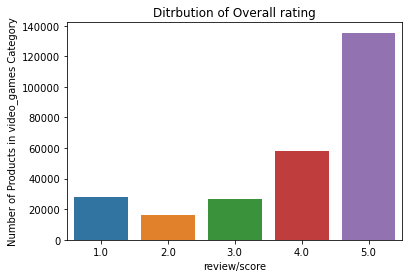

In [76]:
x = video_games['review/score']

video_games['review/score'].value_counts()

sns.countplot(video_games['review/score'])
plt.xlabel('review/score')
plt.ylabel('Number of Products in video_games Category')
plt.title('Ditrbution of Overall rating')


In [77]:
video_games.to_csv(r'C:\Users\tbala\OneDrive\Desktop\Academics\sem 4\Labs\ML_Mini-Project\new_phase\preprocessed_video_games.csv',index = False)

# OFFICE PRODUCTS

In [78]:
off_prod = getDF('Office_Products.txt.gz')
off_prod

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000E7F8LA,"Low Odor Dry Erase Markers, Vibrant DryGuard I...",unknown,A266N1TVOHUG8V,S. Young,0/0,4.0,1214784000,Boone Dry Erase Markers,I was really happy to find out that I was stil...
1,B000CD483K,C-Line Clear 62033 Heavyweight Antimicrobial P...,17.94,A1186EZQ23CU4X,"Thomas Perrin ""Perrin & Treggett""",0/0,5.0,1353628800,Superior product for archival storage,Ever since some of my important family documen...
2,B0006Q9950,Wasp Barcode Technologies 633808920128 Cordles...,443.04,A2CW9GKMNFAU6R,Handyman,14/14,4.0,1320364800,"Good product, bad instructions",My boss had us using cheap USB barcode scanner...
3,B0001YXWV4,Panasonic MARKER ERASER KIT 1 EA-BLK RED BLU E...,13.99,A14XEQHPPULFDA,C L Huddleston,0/0,5.0,1359676800,Best markers made,We use our white boards every day. Tired of ma...
4,B0001YXWV4,Panasonic MARKER ERASER KIT 1 EA-BLK RED BLU E...,13.99,A7YN96KKCI8GO,Eiji Nakamura,0/0,5.0,1358294400,Good item,Fast shipment and fast response.The item is go...
...,...,...,...,...,...,...,...,...,...,...
138079,B0006Q994Q,Informatics WASP WWR 2905 PEN SCANNER W/USB ( ...,124.98,A3I937JLTEQSLL,iix,3/3,5.0,1268352000,It Works,We replaced an old pen scanner on a computer a...
138080,B0006Q994Q,Informatics WASP WWR 2905 PEN SCANNER W/USB ( ...,124.98,A2BYPXW5Y0APQP,"Robert ""Linux User, Attorney, Hacker""",7/9,5.0,1236384000,"Useful Bar code Scanner, works as a usb keyboa...","This product takes some getting used to, howev..."
138081,B0006Q994Q,Informatics WASP WWR 2905 PEN SCANNER W/USB ( ...,124.98,AT519GX007VRB,TheDude,2/2,3.0,1289347200,"It works, but only on shorter barcodes",It works. It doesn't require any drivers and w...
138082,B0006Q994Q,Informatics WASP WWR 2905 PEN SCANNER W/USB ( ...,124.98,A3NSKTIBPYH1G7,Frances S. Childers,0/0,1.0,1356739200,Scanner,Has never worked properly. Even sat through a ...


# DATA CLEANING

In [79]:
off_prod['product/price'].value_counts()

unknown    45997
11.99        948
9.99         812
95.82        671
14.99        662
           ...  
88.63          1
0.45           1
420.00         1
178.48         1
36.53          1
Name: product/price, Length: 3924, dtype: int64

## unknown priced products are not included in our Analysis so we are dropping the unknown priced products

In [80]:
off_prod = off_prod[off_prod['product/price']!='unknown']
off_prod.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1,B000CD483K,C-Line Clear 62033 Heavyweight Antimicrobial P...,17.94,A1186EZQ23CU4X,"Thomas Perrin ""Perrin & Treggett""",0/0,5.0,1353628800,Superior product for archival storage,Ever since some of my important family documen...
2,B0006Q9950,Wasp Barcode Technologies 633808920128 Cordles...,443.04,A2CW9GKMNFAU6R,Handyman,14/14,4.0,1320364800,"Good product, bad instructions",My boss had us using cheap USB barcode scanner...
3,B0001YXWV4,Panasonic MARKER ERASER KIT 1 EA-BLK RED BLU E...,13.99,A14XEQHPPULFDA,C L Huddleston,0/0,5.0,1359676800,Best markers made,We use our white boards every day. Tired of ma...
4,B0001YXWV4,Panasonic MARKER ERASER KIT 1 EA-BLK RED BLU E...,13.99,A7YN96KKCI8GO,Eiji Nakamura,0/0,5.0,1358294400,Good item,Fast shipment and fast response.The item is go...
5,B000NW7LWU,Acme Blueprint Business Card Case Holder,37.00,A15E4PJIU8OK66,Brinn Sustala,2/2,3.0,1287446400,"Nice Aesthetics, Poor Functionality Over Time",I bought this case about 3 years ago when I gr...


## checking for null values

In [81]:
off_prod.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

## There are no null values in the Office Products

In [82]:
pd.DataFrame(off_prod["review/userId"].value_counts())

,review/userId
unknown,796
A2R6RA8FRBS608,48
A3OXHLG6DIBRW8,42
A1HB4CDDYDFJ9Z,39
A22CW0ZHY3NJH8,37
...,...
A1J87HD3JSPMQH,1
A2CIH6TMZK20PP,1
ARXN43NNUF5EI,1
A1PBXWBNBZLLQN,1


## Unknown userid gave the more reviews in Arts Dataset But Uknown userid is not useful in our Analysis

In [83]:
off_prod = off_prod[off_prod['review/userId']!='unknown']
off_prod.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1,B000CD483K,C-Line Clear 62033 Heavyweight Antimicrobial P...,17.94,A1186EZQ23CU4X,"Thomas Perrin ""Perrin & Treggett""",0/0,5.0,1353628800,Superior product for archival storage,Ever since some of my important family documen...
2,B0006Q9950,Wasp Barcode Technologies 633808920128 Cordles...,443.04,A2CW9GKMNFAU6R,Handyman,14/14,4.0,1320364800,"Good product, bad instructions",My boss had us using cheap USB barcode scanner...
3,B0001YXWV4,Panasonic MARKER ERASER KIT 1 EA-BLK RED BLU E...,13.99,A14XEQHPPULFDA,C L Huddleston,0/0,5.0,1359676800,Best markers made,We use our white boards every day. Tired of ma...
4,B0001YXWV4,Panasonic MARKER ERASER KIT 1 EA-BLK RED BLU E...,13.99,A7YN96KKCI8GO,Eiji Nakamura,0/0,5.0,1358294400,Good item,Fast shipment and fast response.The item is go...
5,B000NW7LWU,Acme Blueprint Business Card Case Holder,37.00,A15E4PJIU8OK66,Brinn Sustala,2/2,3.0,1287446400,"Nice Aesthetics, Poor Functionality Over Time",I bought this case about 3 years ago when I gr...


## Cleaning the data and removing the special characters and replacing the contractions with its expansion by converting the uppercase character to lower case. Also, removing the punctuations.


In [84]:
# applying the function to all review statements 
off_prod["review/text"] = off_prod["review/text"].apply(lambda x:cont_to_exp(x))
off_prod["review/summary"] = off_prod["review/summary"].apply(lambda x:cont_to_exp(x))
off_prod.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1,B000CD483K,C-Line Clear 62033 Heavyweight Antimicrobial P...,17.94,A1186EZQ23CU4X,"Thomas Perrin ""Perrin & Treggett""",0/0,5.0,1353628800,Superior product for archival storage,Ever since some of my important family documen...
2,B0006Q9950,Wasp Barcode Technologies 633808920128 Cordles...,443.04,A2CW9GKMNFAU6R,Handyman,14/14,4.0,1320364800,"Good product, bad instructions",My boss had us using cheap USB barcode scanner...
3,B0001YXWV4,Panasonic MARKER ERASER KIT 1 EA-BLK RED BLU E...,13.99,A14XEQHPPULFDA,C L Huddleston,0/0,5.0,1359676800,Best markers made,We use our white boards every day. Tired of ma...
4,B0001YXWV4,Panasonic MARKER ERASER KIT 1 EA-BLK RED BLU E...,13.99,A7YN96KKCI8GO,Eiji Nakamura,0/0,5.0,1358294400,Good item,Fast shipment and fast response.The item is go...
5,B000NW7LWU,Acme Blueprint Business Card Case Holder,37.00,A15E4PJIU8OK66,Brinn Sustala,2/2,3.0,1287446400,"Nice Aesthetics, Poor Functionality Over Time",I bought this case about 3 years ago when I gr...


## Here price and rating are in categorical variables so we need to convert into numerical type to analyse it

In [85]:
off_prod['product/price'] = pd.to_numeric(off_prod['product/price'])
off_prod['review/score'] = pd.to_numeric(off_prod['review/score'])


# EXPLORATORY DATA ANALYSIS

## Decreasing order of the reviews given by the userid

In [86]:
pd.DataFrame(off_prod["review/userId"].value_counts())


,review/userId
A2R6RA8FRBS608,48
A3OXHLG6DIBRW8,42
A1HB4CDDYDFJ9Z,39
A22CW0ZHY3NJH8,37
A3FKGKUCI3DG9U,34
...,...
A1J87HD3JSPMQH,1
A2CIH6TMZK20PP,1
ARXN43NNUF5EI,1
A1PBXWBNBZLLQN,1


## There are total 75735 userid's in this cateory

## Decreasing order of reviews of the product with productid

In [87]:
pd.DataFrame(off_prod["product/productId"].value_counts())

,product/productId
B0009WPKY0,648
B00005NT9E,623
B00001N2QU,574
B000HVVSDU,548
B000OOYECC,499
...,...
B00006IF0V,1
B000AN5B56,1
B0006HUR82,1
B000J09VZQ,1


## There are 8791 different products in the this DataSet

In [88]:
min_max_mean(off_prod)

The minimum price of the products in this Category is:  0.01
The maximum price of the products in this Category is:  999.0
The average price of the products in this Category is:  41.238691765913316


In [89]:
off_prod.describe()

,product/price,review/score
count,91291.000000,91291.000000
mean,41.238692,4.114929
std,70.919539,1.322497
min,0.010000,1.000000
25%,9.690000,4.000000
50%,18.790000,5.000000
75%,44.620000,5.000000
max,999.000000,5.000000


In [90]:
off_prod['review/score'].value_counts()

5.0    54011
4.0    16509
1.0     8923
3.0     6946
2.0     4902
Name: review/score, dtype: int64

## Many of them have given the 5 ratings to this Category

# Distribution of overall product ratings

C:\Users\tbala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ditrbution of Overall rating')

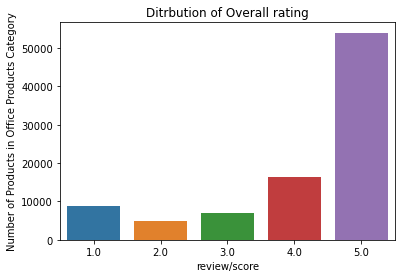

In [91]:
x = off_prod['review/score']

off_prod['review/score'].value_counts()

sns.countplot(off_prod['review/score'])
plt.xlabel('review/score')
plt.ylabel('Number of Products in Office Products Category')
plt.title('Ditrbution of Overall rating')

In [92]:
off_prod.to_csv(r'C:\Users\tbala\OneDrive\Desktop\Academics\sem 4\Labs\ML_Mini-Project\new_phase\preprocessed_off_prod.csv',index = False)

# ELECTRONICS CATEGORY

In [93]:
electronics = getDF('Electronics.txt.gz')
electronics.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,A2F6FARSB1VL6Q,"""frumpy16""",2/2,5.0,1072915200,Great charger,I recently bought this charger kit from Amazon...
1,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,unknown,unknown,2/2,5.0,1058745600,Super product! I'm very happy.,"The batteries are excellent (1850's), and the ..."
2,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,A3P56Q3XEGTBNY,Yisheng Zhang,1/1,2.0,1127088000,Problem with charging smaller AAAs,I have had the charger for more than two years...
3,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,unknown,unknown,3/4,5.0,1068768000,CHECK OUT THE K6000 CHARGER!,Greetings. Kodak also has a K6000 charger whic...
4,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,AZIM9ZTGB8Q12,G. Evans,0/0,5.0,1274313600,Finally a Great recharger with batteries!,I have used and recharged my batteries nearly ...


# DATA CLEANING

In [94]:
electronics['product/price'].value_counts()

unknown    643429
3.98         7689
9.99         7210
19.99        6846
18.95        6426
            ...  
227.95          1
228.97          1
273.98          1
87.32           1
32.37           1
Name: product/price, Length: 7614, dtype: int64

## unknown priced products are not included in our Analysis so we are dropping the unknown priced products

In [95]:
electronics = electronics[electronics['product/price']!='unknown']
electronics.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
85,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,Thomas O. Fort,0/0,4.0,1245974400,nifty,It is very convenient to have the charging cab...
86,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,Michael,1/1,5.0,1287273600,APC P1T 120V Portable Surge Protector,Perfect carry-along for my notebook PC. Useful...
87,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,"Ross Knight ""Subvet""",0/0,5.0,1360108800,Insurance policy!,This protector is an excellent value. Rated ve...
88,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,Kevin,0/0,5.0,1359244800,Works great for appliances,I bought one of these to protect my washing ma...
89,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,Bruce E Harrison,0/0,5.0,1355270400,Single Surge Protector,Just right for travel for my computer and it i...


## checking for null values

In [96]:
electronics.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

## There are no null values in the Dataset


In [97]:
pd.DataFrame(electronics["review/userId"].value_counts())

,review/userId
unknown,7893
AYA4HL04UH8JT,309
ARBKYIVNYWK3C,206
A5JLAU2ARJ0BO,106
A3OXHLG6DIBRW8,104
...,...
A3K1STFCDF68NQ,1
A1VAC7PDF1QVFK,1
A32K4JON6JIZN4,1
A2RSF3DZABAWGG,1


## Unknown userid gave the more reviews in Arts Dataset But Uknown userid is not useful in our Analysis

In [98]:
electronics = electronics[electronics['review/userId']!='unknown']
electronics.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
85,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,Thomas O. Fort,0/0,4.0,1245974400,nifty,It is very convenient to have the charging cab...
86,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,Michael,1/1,5.0,1287273600,APC P1T 120V Portable Surge Protector,Perfect carry-along for my notebook PC. Useful...
87,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,"Ross Knight ""Subvet""",0/0,5.0,1360108800,Insurance policy!,This protector is an excellent value. Rated ve...
88,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,Kevin,0/0,5.0,1359244800,Works great for appliances,I bought one of these to protect my washing ma...
89,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,Bruce E Harrison,0/0,5.0,1355270400,Single Surge Protector,Just right for travel for my computer and it i...


In [99]:
# applying the function to all review statements 
electronics["review/text"] = electronics["review/text"].apply(lambda x:cont_to_exp(x))
electronics["review/summary"] = electronics["review/summary"].apply(lambda x:cont_to_exp(x))
electronics.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
85,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,Thomas O. Fort,0/0,4.0,1245974400,nifty,It is very convenient to have the charging cab...
86,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,Michael,1/1,5.0,1287273600,APC P1T 120V Portable Surge Protector,Perfect carry-along for my notebook PC. Useful...
87,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,"Ross Knight ""Subvet""",0/0,5.0,1360108800,Insurance policy!,This protector is an excellent value. Rated ve...
88,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,Kevin,0/0,5.0,1359244800,Works great for appliances,I bought one of these to protect my washing ma...
89,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,Bruce E Harrison,0/0,5.0,1355270400,Single Surge Protector,Just right for travel for my computer and it i...


## Here price and rating are in categorical variables so we need to convert into numerical type to analyse it


In [100]:
electronics['product/price'] = pd.to_numeric(electronics['product/price'])
electronics['review/score'] = pd.to_numeric(electronics['review/score'])


# EXPLORATORY DATA ANALYSIS

## Decreasing order of the reviews given by the userid

In [101]:
pd.DataFrame(electronics["review/userId"].value_counts())

,review/userId
AYA4HL04UH8JT,309
ARBKYIVNYWK3C,206
A5JLAU2ARJ0BO,106
A3OXHLG6DIBRW8,104
A203OCQQ12MAVT,97
...,...
A3K1STFCDF68NQ,1
A1VAC7PDF1QVFK,1
A32K4JON6JIZN4,1
A2RSF3DZABAWGG,1


## There are total 449773 userid's in this cateory

## Decreasing order of reviews of the product with productid

In [102]:
pd.DataFrame(electronics["product/productId"].value_counts())

,product/productId
B0002L5R78,7582
B000LRMS66,5870
B000JMJWV2,3297
B0001FTVEK,3184
B000NWS3SG,2963
...,...
B00000J0QD,1
B000HHHT5A,1
B000BT674I,1
B000CSOJC0,1


## There are 30435 different products in the this DataSet


In [103]:
min_max_mean(electronics)

The minimum price of the products in this Category is:  0.01
The maximum price of the products in this Category is:  999.99
The average price of the products in this Category is:  65.69757710976525


In [104]:
electronics.describe()

,product/price,review/score
count,590456.000000,590456.000000
mean,65.697577,4.000158
std,114.122077,1.398443
min,0.010000,1.000000
25%,10.950000,3.000000
50%,25.950000,5.000000
75%,64.990000,5.000000
max,999.990000,5.000000


In [105]:
electronics['review/score'].value_counts()

5.0    328011
4.0    111923
1.0     71999
3.0     45125
2.0     33398
Name: review/score, dtype: int64

## Many of them have given the 5 ratings to this Category


# Distribution of overall product ratings

C:\Users\tbala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ditrbution of Overall rating')

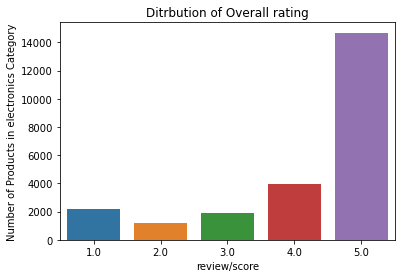

In [106]:
x = electronics['review/score']

electronics['review/score'].value_counts()

sns.countplot(Arts['review/score'])
plt.xlabel('review/score')
plt.ylabel('Number of Products in electronics Category')
plt.title('Ditrbution of Overall rating')

In [107]:
electronics.to_csv(r'C:\Users\tbala\OneDrive\Desktop\Academics\sem 4\Labs\ML_Mini-Project\new_phase\preprocessed_electronics.csv',index = False)